<a href="https://colab.research.google.com/github/Faizal-Basha-S/SKILLCRAFT-TASK-4/blob/main/skillcraft_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the ZIP file in your Google Drive
zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Identify the CSV file
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV files found in the extracted folder.")
csv_file = os.path.join(extract_path, csv_files[0])  # Select first CSV file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset in chunks to handle large file sizes
chunk_size = 100000
chunks = []

for chunk in pd.read_csv(csv_file, chunksize=chunk_size, low_memory=False):
    chunk.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng', 'Severity'], inplace=True)

    # Convert datetime columns (handle errors by coercing invalid dates to NaT)
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'], errors='coerce')
    chunk['End_Time'] = pd.to_datetime(chunk['End_Time'], errors='coerce')

    # Drop rows where date conversion failed
    chunk.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

    # Extract time-based features
    chunk['Hour'] = chunk['Start_Time'].dt.hour
    chunk['DayOfWeek'] = chunk['Start_Time'].dt.dayofweek
    chunk['Month'] = chunk['Start_Time'].dt.month

    chunks.append(chunk)

In [ ]:
# Concatenate all chunks
df = pd.concat(chunks, ignore_index=True)

# Display dataset info
print("Data Loaded Successfully!")
print(df.info())

Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667650 entries, 0 to 6667649
Data columns (total 49 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 

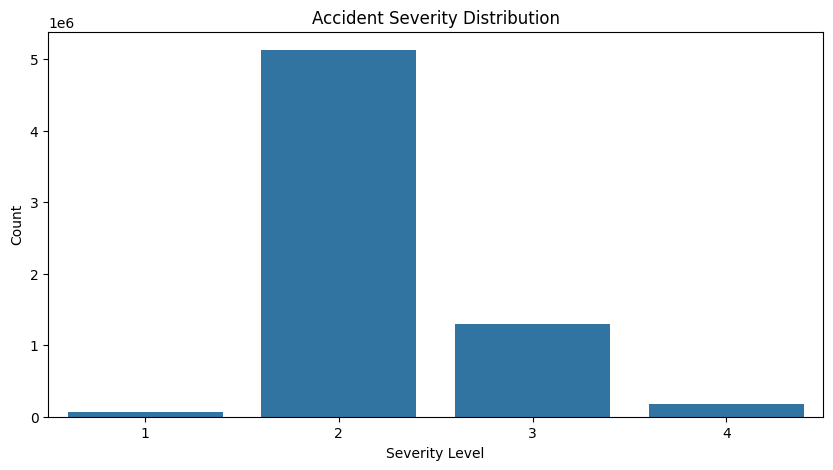

In [ ]:
# Visualizing accident severity distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Severity', data=df)
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.title("Accident Severity Distribution")
plt.show()

<ipython-input-36-cf6f70fe90fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


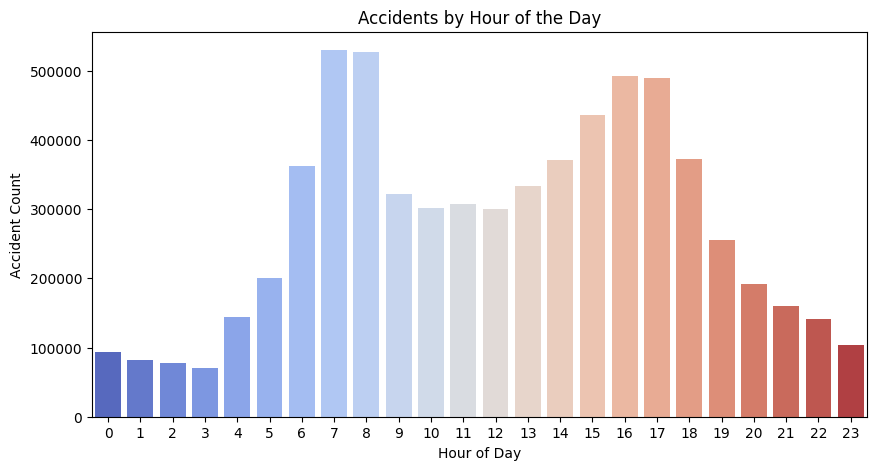

In [ ]:
# Visualizing accidents over different hours of the day
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.title("Accidents by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

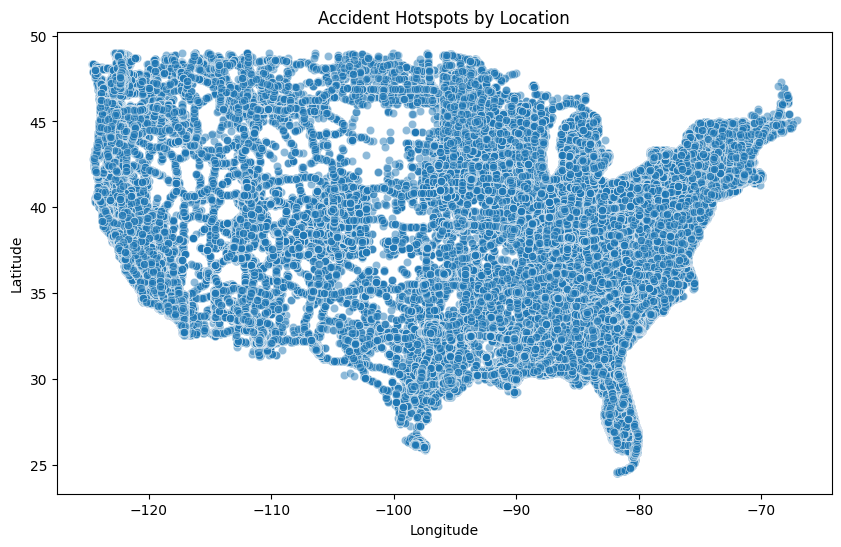

Traffic accident data analysis completed successfully.


In [ ]:
# Visualizing accident locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Start_Lng'], y=df['Start_Lat'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Hotspots by Location")
plt.show()

print("Traffic accident data analysis completed successfully.")